#**Working with Unlabeled Data – Clustering Analysis**

[Youtube enjoy](https://www.youtube.com/watch?v=fCbf4T4Zp5A)

In [30]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

**Unsupervised learning techniques:** that allows us to discover hidden structures in data where we do not know the right answer upfront.


The goal of **clustering** is to find a natural grouping in data so that items in the same cluster are more similar to each other than to those from different clusters.


- Finding centers of similarity using the popular k-means algorithm
- Taking a bottom-up approach to building hierarchical clustering trees
- Identifying arbitrary shapes of objects using a density-based clustering approach


### **Grouping objects by similarity using k-means**

Clustering (or cluster analysis) is a technique that allows us to find groups of similar objects that are more related to each other than to objects in other
groups.

**Examples:**
Business-oriented applications of clustering include the grouping of documents, music, and movies by different topics, or finding customers that share similar interests based on common purchase behaviors as a basis for recommendation engines.


### **k-means clustering using scikit-learn**

- k-means algorithm is extremely easy to implement.
- Computationally very efficient compared to other clustering algorithms, which might explain its popularity.
- The k-means algorithm belongs to the category of **prototype-based clustering**.


Other categories of clustering are:
- **Hierarchical** and
- **Density-based clustering**

**Prototype-based clustering:** means that each cluster is represented by a prototype, which is usually either the centroid (average) of similar points with continuous features, or the medoid (the most representative or the point that minimizes the distance to all other points that belong to a particular cluster) in the
case of categorical features.
- k-means is very good at identifying clusters with a spherical shape.
- one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, k, a priori. An inappropriate choice for k can result in poor clustering performance.

**Techniques to evaluate the quality of a clustering to help us determine the optimal number of clusters, k**
  - **elbow method** and
  - **silhouette plots**

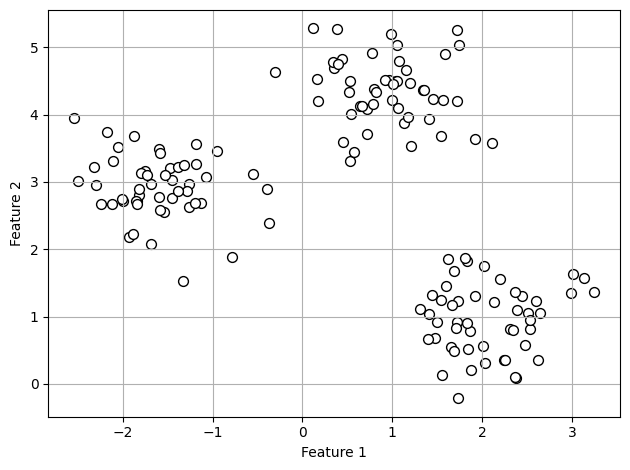

In [31]:
# make_blobs to create artificial dataset
from sklearn.datasets import make_blobs
# create artificial dataset
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)
# plot the clusters
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],
            X[:, 1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

**k-means algorithm four steps:**
1. Randomly pick k centroids from the examples as initial cluster centers
2. Assign each example to the nearest centroid, 𝜇<sup>(𝑗)</sup>
,𝑗 ε {1, … , 𝑘}
3. Move the centroids to the center of the examples that were assigned to it
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached

**squared Euclidean distance:**  
We can define similarity as the
opposite of distance, and a commonly used distance for clustering

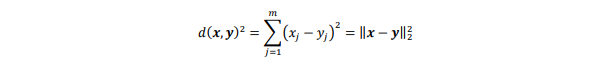

Now that you have learned how the simple k-means algorithm works, let’s apply it to our example dataset using the KMeans class from scikit-learn’s cluster module:

In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

In [33]:
# test our clustering accuracy but note
# in real-world as mentioned there's no
# so called ground-truth
import numpy as np
np.sum(y_km == y)

150

####**Problems with K-means:**

A problem with k-means is that one or more clusters can be empty. Note that this problem does not exist for k-medoids or fuzzy C-means.



**Feature scaling**

When we are applying k-means to real-world data using a Euclidean distance metric, we
want to make sure that the features are measured on the same scale and apply z-score standardization or min-max scaling if necessary.

In [34]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

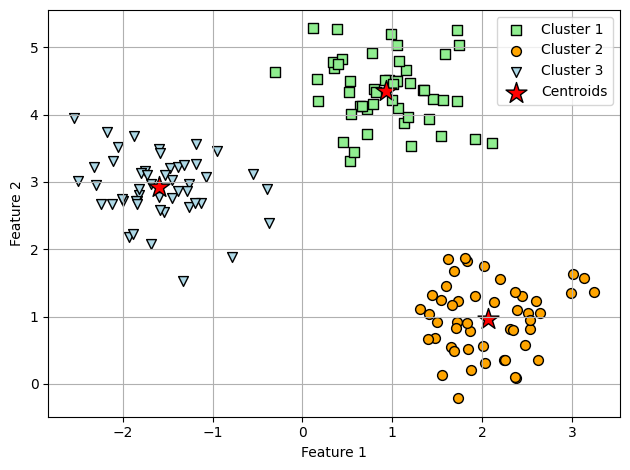

In [35]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### **A smarter way of placing the initial cluster centroids using k-means++**




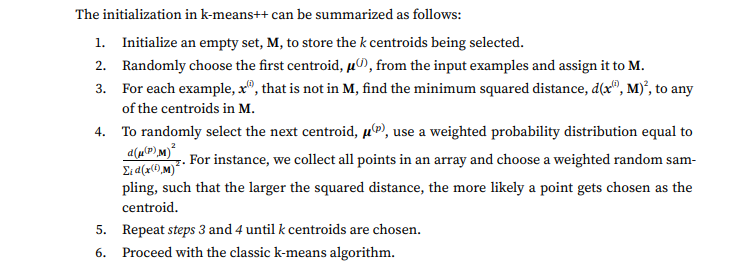

### **Hard versus soft clustering**

**Hard clustering:** describes a family of algorithms where each example in a dataset is assigned to exactly one cluster, as in the k-means and k-means++ algorithms that we discussed ealier in this chapter.


**Soft clustering:** (sometimes also called **fuzzy clustering**) assign an example to one or more clusters.

Example of soft clustering:
- Fuzzy C-means(FCM) algorithm(also called **soft k-means or **fuzzy k-means**).

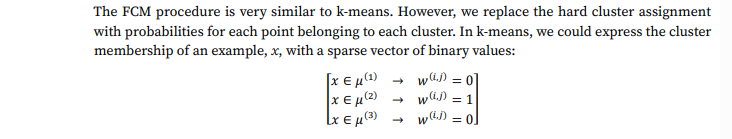

### **Using the elbow method to find the optimal number of clusters**



In [36]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters, k, for a given task. We can say that if k increases, the distortion will
decrease. This is because the examples will be closer to the centroids they are assigned to. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most
rapidly, which will become clearer if we plot the distortion for different values of k:

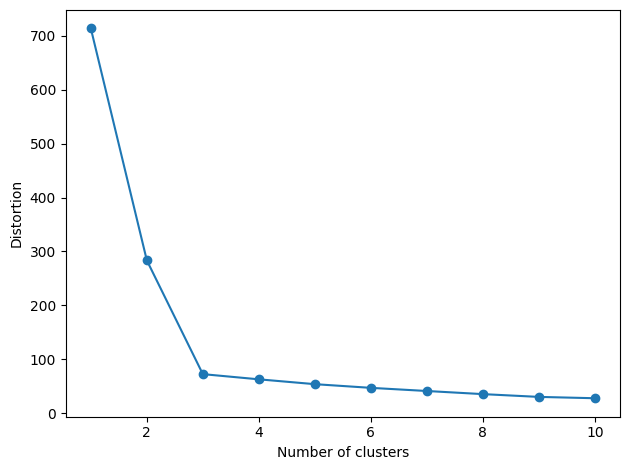

In [37]:
distortions = []

for i in range(1, 11):
  km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### **Quantifying the quality of clustering via silhouette plots**

Another intrinsic metric to evaluate the quality of a clustering is **silhouette analysis**, which can also be applied to clustering algorithms other than k-means that we will discuss later in this chapter. Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the examples
in the clusters are. To calculate the **silhouette coefficient** of a single example in our dataset.

- The silhouette coefficient is bounded in the range –1 to 1.

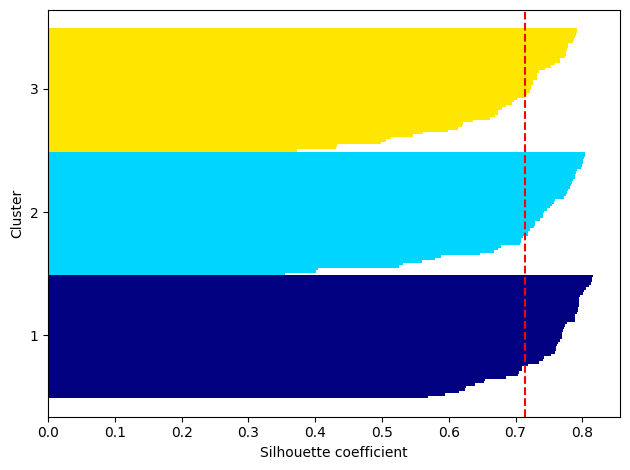

In [38]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

**Interpretation:**

However, as you can see in the preceding silhouette plot, the silhouette coefficients are not close to 0 and are approximately equally far away from the average silhouette score, which is, in this case, an indicator of good clustering. Furthermore, to summarize the goodness of our clustering, we added
the average silhouette coefficient to the plot (dotted line).


### **Bad Clustering:**

To see what a silhouette plot looks like for a relatively bad clustering, let’s seed the k-means algorithm
with only two centroids:

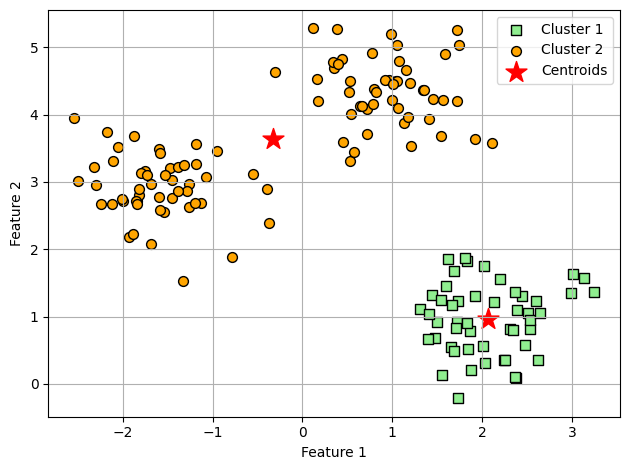

In [39]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Please keep in mind that we typically do not have the luxury of visualizing datasets in two-dimensional scatterplots in real-world problems, since we typically work with data in higher dimensions. So, next, we will create the silhouette plot to evaluate the results:

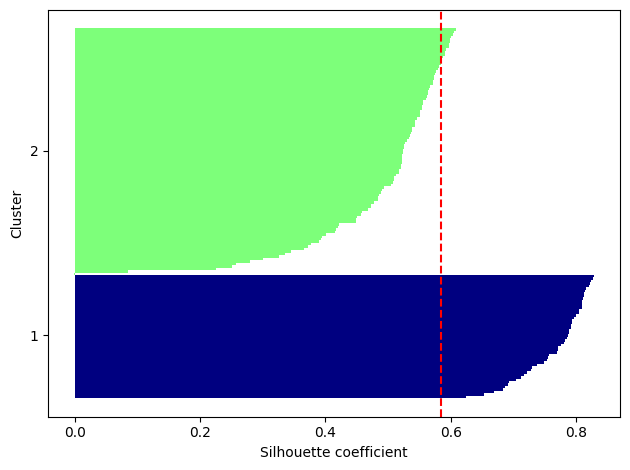

In [40]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### **Organizing clusters as a hierarchical tree**

**Hierarchical clustering:**
- One advantage of the hierarchical clustering algorithm is that it allows us to plot **dendrograms** (visualizations of a binary hierarchical clustering), which can help with the interpretation of the results by creating meaningful taxonomies.

- Another advantage of this hierarchical approach is that we do not need to specify the number of clusters upfront.

Approaches of hierachical clustering:
- Agglomerative
- Divisive

**Divisive hierarchical clustering:** we start with one cluster that encompasses the complete dataset, and we iteratively split the cluster into smaller clusters until each cluster only contains one example.

**Agglomerative clustering:** which takes the opposite approach we start with each example as an individual cluster and merge the closet pairs of clusters until only one cluster remains.


### **Grouping clusters in a bottom-up fashion**

The two standard algorithms for agglomerative hierarchical clustering are:

- Single linkage
- Complete linkage

**Single linkage**: we compute the distances between the most similar members for each pair of clusters and merge two clusters for which the distance between the most similar members is the smallest.

**Complete linkage:** is similar to single linkage but, instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge.

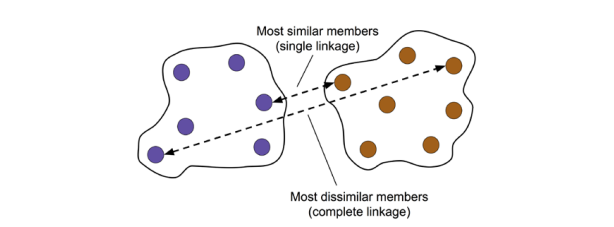

Hierarchical complete linkage clustering is an iterative procedure that can be summarized by the following
steps:
   1. Compute a pair-wise distance matrix of all examples.
   2. Represent each data point as a singleton cluster.
   3. Merge the two closest clusters based on the distance between the most dissimilar (distant) members.

4. Update the cluster linkage matrix.

5. Repeat steps 2-4 until one single cluster remains.



Let’s generate a random data sample to work with. The rows represent different observations (IDs 0-4), and the columns are the different features (X, Y, Z) of those examples:

In [41]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### **Performing hierarchical clustering on a distance matrix**

To calculate the distance matrix as input for the hierarchical clustering algorithm, we will use the pdist function from SciPy’s spatial.distance submodule:

In [42]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the pdist function, or we can pass the "original" data array and define the metric='euclidean' argument in linkage. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [43]:
# 1. incorrect approach: Squareform distance matrix

from scipy.cluster.hierarchy import linkage


row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [44]:
# 2. correct approach: Condensed distance matrix

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [45]:
# 3. correct approach: Input matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


Now that we have computed the linkage matrix, we can visualize the results in the form of a dendrogram:

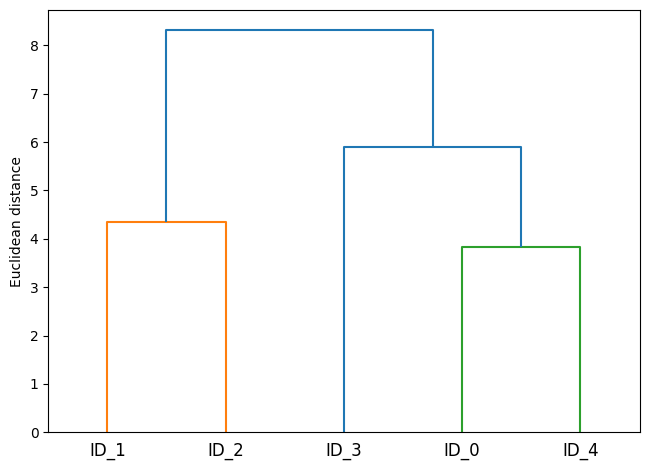

In [46]:
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(
     row_clusters,
     labels=labels,
     # make dendrogram black (part 2/2)
     # color_threshold=np.inf
     )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

**Interpretation:**
Such a dendrogram summarizes the different clusters that were formed during the agglomerative hierarchical clustering; for example, you can see that the examples ID_0 and ID_4, followed by ID_1 and ID_2, are the most similar ones based on the Euclidean distance metric.


### **Attaching dendrograms to a heat map**
In practical applications, hierarchical clustering dendrograms are often used in combination with a **heat map**, which allows us to represent the individual values in the data array or matrix containing our training examples with a color code. In this section, we will discuss how to attach a dendrogram
to a heat map plot and order the rows in the heat map correspondingly.

However, attaching a dendrogram to a heat map can be a little bit tricky, so let’s go through this procedure step by step:
 1. We create a new figure object and define the x axis position, y axis position, width, and height
of the dendrogram via the add_axes attribute. Furthermore, we rotate the dendrogram 90 degrees counterclockwise. The code is as follows:

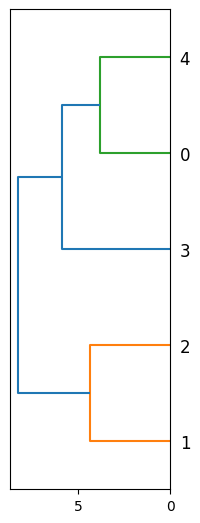

In [47]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
# note: for matplotlib < v1.5.1, please use
# orientation='right'

   2. Next, we reorder the data in our initial DataFrame according to the clustering labels that can be accessed from the dendrogram object, which is essentially a Python dictionary, via the leaves key. The code is as follows:

In [48]:
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

 3. Now, we construct the heat map from the reordered DataFrame and position it next to the dendrogram:

In [49]:
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest',
                  cmap='hot_r')

 4. Finally, we modify the aesthetics of the dendrogram by removing the axis ticks and hiding the axis spines. Also, we add a color bar and assign the feature and data record names to the x and y axis tick labels, respectively:

In [50]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## **Full Code**

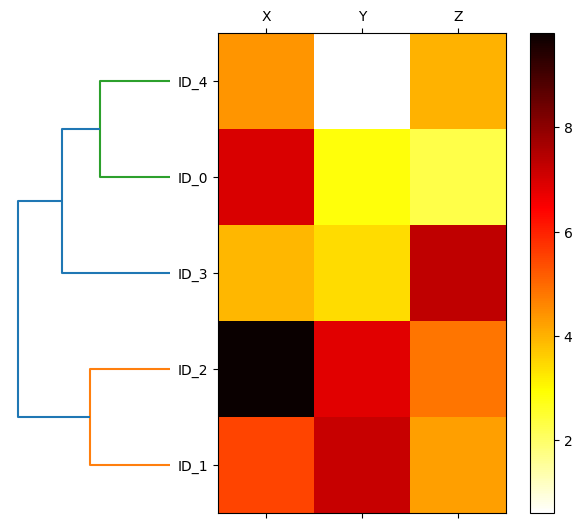

In [51]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

**Interpretation:**

As you can see, the order of rows in the heat map reflects the clustering of the examples in the dendrogram. In addition to a simple dendrogram, the color-coded values of each example and feature in
the heat map provide us with a nice summary of the dataset.

### **Applying agglomerative clustering via scikit-learn**

By setting the n_cluster parameter to 3, we will now cluster the input examples into three groups using the same complete linkage approach based on the Euclidean distance metric as before:

In [52]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


### **Locating regions of high density via DBSCAN**

**DBSCAN (density-based spatial clustering of applications with noise):**
which does not make assumptions about spherical clusters like k-means, nor does
it partition the dataset into hierarchies that require a manual cut-off point. As its name implies, density-based clustering assigns cluster labels based on dense regions of points. In DBSCAN, the notion
of density is defined as the number of points within a specified radius, 𝜀.

According to the DBSCAN algorithm, a special label is assigned to each example (data point) using the following criteria:

- A point is considered a **core point** if at least a specified number (MinPts) of neighboring points
fall within the specified radius, 𝜀
- A **border point** is a point that has fewer neighbors than MinPts within 𝜀, but lies within the 𝜀 radius of a core point
- All other points that are neither core nor border points are considered **noise points**

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two
simple steps:
1. Form a separate cluster for each core point or connected group of core points. (Core points
are connected if they are no farther away than 𝜀.)
2. Assign each border point to the cluster of its corresponding core point.

To get a better understanding of what the result of DBSCAN can look like, before jumping to the implementation, let’s summarize what we have just learned about core points, border points, and noise
points in Figure 10.13:

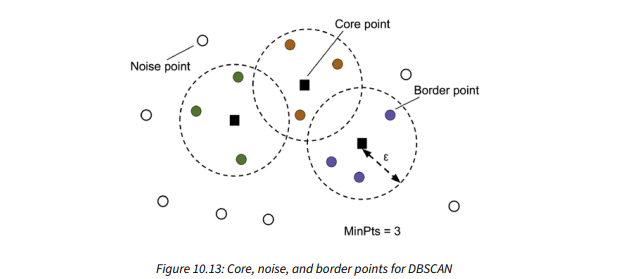

**Pros:**
- One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means.
- Furthermore, DBSCAN is different from k-means and hierarchical clustering
in that it doesn’t necessarily assign each point to a cluster but is capable of removing noise points.


For a more illustrative example, let’s create a new dataset of half-moon-shaped structures to compare
k-means clustering, hierarchical clustering, and DBSCAN:

As you can see in the resulting plot, there are two visible, half-moon-shaped
groups consisting of 100 examples (data points) each:




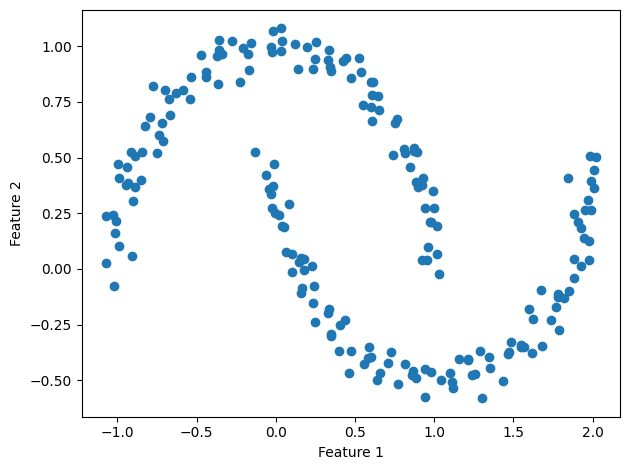

In [55]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

print("As you can see in the resulting plot, there are two visible, half-moon-shaped\n\
groups consisting of 100 examples (data points) each:\n\n")


plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

**K-means and hierarchical clustering:**

We will start by using the k-means algorithm and complete linkage clustering to see if one of those
previously discussed clustering algorithms can successfully identify the half-moon shapes as separate
clusters. The code is as follows:

Based on the visualized clustering results, we can see that the k-means algorithm
was unable to separate the two clusters, and also,the hierarchical clustering algorithm
was challenged by those complex shapes:




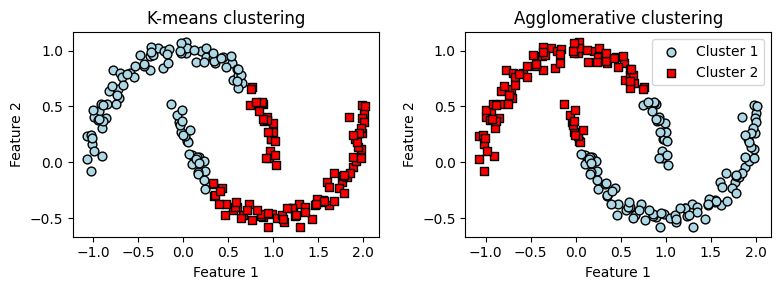

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')


print('Based on the visualized clustering results, we can see that the k-means algorithm\n\
was unable to separate the two clusters, and also,the hierarchical clustering algorithm\n\
was challenged by those complex shapes:\n\n')

plt.legend()
plt.tight_layout()
plt.show()

**Density-based clustering:**


Finally, let’s try the DBSCAN algorithm on this dataset to see if it can find the two half-moon-shaped clusters using a density-based approach:

The DBSCAN algorithm can successfully detect the half-moon shapes, which
highlights one of the strengths of DBSCAN—clustering data of arbitrary shapes:




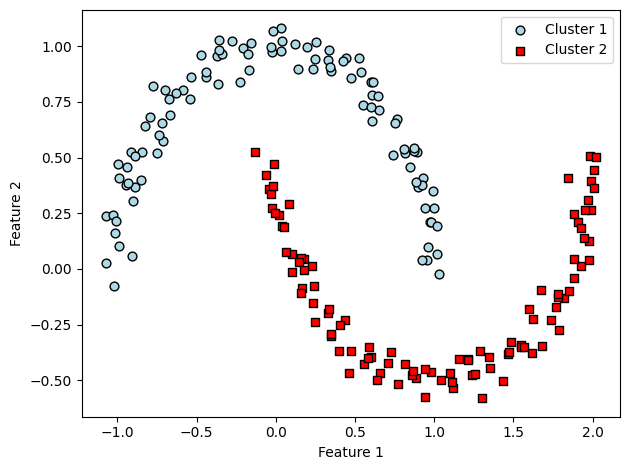

In [65]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black',
            label='Cluster 2')


print("The DBSCAN algorithm can successfully detect the half-moon shapes, which\n\
highlights one of the strengths of DBSCAN—clustering data of arbitrary shapes:\n\n")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.tight_layout()
plt.show()

**Cons:**

However, we should also note some of the disadvantages of DBSCAN. With an increasing number of
features in our dataset—assuming a fixed number of training examples—the negative effect of the **curse of dimensionality** increases. This is especially a problem if we are using the Euclidean distance metric. However, the problem of the curse of dimensionality is not unique to DBSCAN: it also affects other clustering algorithms that use the Euclidean distance metric, for example, k-means and hierarchical clustering algorithms. In addition, we have two hyperparameters in DBSCAN (MinPts and 𝜀)
that need to be optimized to yield good clustering results. Finding a good combination of MinPts and 𝜀 can be problematic if the density differences in the dataset are relatively large.



<br>

**Graph-based clustering**

So far, we have seen three of the most fundamental categories of clustering algorithms:
prototype-based clustering with k-means, agglomerative hierarchical clustering, and density-based clustering via DBSCAN. However, there is also a fourth class of more advanced
clustering algorithms that we have not covered in this chapter: graph-based clustering.
Probably the most prominent members of the graph-based clustering family are the spectral clustering algorithms.

# **Summary**